In [128]:
import requests
import json
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import datetime as dt

In [44]:
%%time 

url = "https://api.coincap.io/v2/assets"

# N.B. here adampt the params dict to only request what you need
payload={'limit': '10'}
headers = {}

response_assets = requests.request("GET", url, params=payload, headers=headers)

CPU times: user 16.3 ms, sys: 9.84 ms, total: 26.1 ms
Wall time: 427 ms


In [45]:
assets_json = response_assets.json()

In [192]:
assets_json

{'data': [{'id': 'bitcoin',
   'rank': '1',
   'symbol': 'BTC',
   'name': 'Bitcoin',
   'supply': '19029418.0000000000000000',
   'maxSupply': '21000000.0000000000000000',
   'marketCapUsd': '728317786941.2541266366905136',
   'volumeUsd24Hr': '10509103388.5499874580047421',
   'priceUsd': '38273.2560155677975352',
   'changePercent24Hr': '-1.0891122836583610',
   'vwap24Hr': '38455.2643609826990289',
   'explorer': 'https://blockchain.info/'},
  {'id': 'ethereum',
   'rank': '2',
   'symbol': 'ETH',
   'name': 'Ethereum',
   'supply': '120630058.9365000000000000',
   'maxSupply': None,
   'marketCapUsd': '339499221461.2549094124084498',
   'volumeUsd24Hr': '7615654976.4133436122620100',
   'priceUsd': '2814.3832843517737811',
   'changePercent24Hr': '-0.4223628468284657',
   'vwap24Hr': '2837.6948286919651751',
   'explorer': 'https://etherscan.io/'},
  {'id': 'tether',
   'rank': '3',
   'symbol': 'USDT',
   'name': 'Tether',
   'supply': '83157877104.4121400000000000',
   'maxSuppl

In [46]:
ids_list = []
for dict in assets_json['data']:
    ids_list.append(dict['id'])

In [47]:
ids_list

['bitcoin',
 'ethereum',
 'tether',
 'binance-coin',
 'usd-coin',
 'solana',
 'terra-luna',
 'xrp',
 'cardano',
 'terrausd']

In [189]:
symbol_list = []
for dict in assets_json['data']:
    symbol_list.append(dict['symbol'])
symbol_list

['BTC', 'ETH', 'USDT', 'BNB', 'USDC', 'SOL', 'LUNA', 'XRP', 'ADA', 'UST']

In [54]:
%%time
url = "http://api.coincap.io/v2/assets/{}/history?interval=d1"

payload={}
headers = {}

histories_dict = {}
for id in ids_list:
    response_histories = requests.request("GET", url.format(id), headers=headers, data=payload)
    histories_json = response_histories.json()
    histories_dict[id] = histories_json['data']

CPU times: user 281 ms, sys: 56.6 ms, total: 337 ms
Wall time: 6.05 s


In [58]:
for id in ids_list:
    print(id +": {}".format(len(histories_dict[id])))

bitcoin: 364
ethereum: 364
tether: 364
binance-coin: 364
usd-coin: 364
solana: 364
terra-luna: 364
xrp: 364
cardano: 364
terrausd: 356


In [146]:
dt.datetime.strptime(histories_dict['bitcoin'][0]['date'][0:10], '%Y-%m-%d')

datetime.datetime(2021, 5, 4, 0, 0)

In [143]:
histories_dict['bitcoin'][0]['date'].strftime('%d %b %Y')

AttributeError: 'str' object has no attribute 'strftime'

In [148]:
def date_conv(date):
    return dt.datetime.strptime(date, '%Y-%m-%d')
price_histories_df = pd.DataFrame(columns=['coin','date','price'])
return_histories_df = pd.DataFrame(columns=['coin','date','price'])
for id in ids_list:
    price=[]
    date=[]
    for observation in histories_dict[id]:
        date.append(date_conv(observation['date'][0:10]))
        #date.append(observation['time'])
        price.append(float(observation['priceUsd']))
    price_df = pd.DataFrame({"coin": id, "date":date, "price": price})
    price_histories_df = pd.concat([price_histories_df, price_df])
    returns = [float(b) / float(a) for b,a in zip(price[1:], price[:-1])]
    returns_df = pd.DataFrame({"coin": id, "date":date[1:], "price": returns})
    return_histories_df = pd.concat([return_histories_df, returns_df])

In [119]:
price=[]
date=[]
for observation in histories_dict['bitcoin']:
    date.append(observation['date'][0:10])
    #date.append(observation['time'])
    price.append(float(observation['priceUsd']))
price_df = pd.DataFrame({"coin": 'bitcoin', "date":date, "price": price})
returns = [float(b) / float(a) for b,a in zip(price[1:], price[:-1])]
returns_df = pd.DataFrame({"coin": 'bitcoin', "date":date[1:], "price": returns})

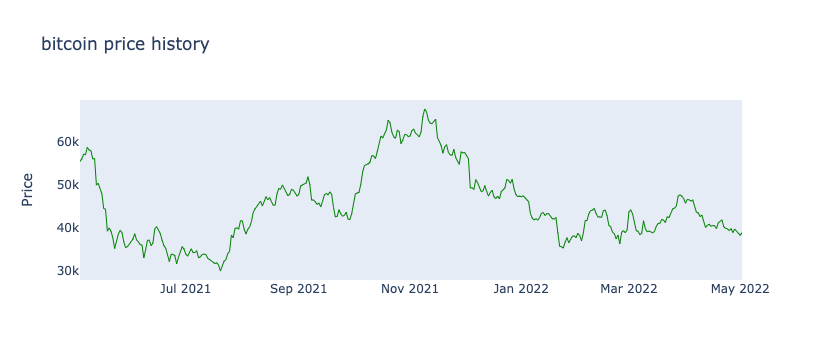

In [91]:
fig = go.Figure(data=
                [
                go.Scatter(x=date, y=price,
                            line={'color':'green', 'width':1},name='bitcoin')])

fig.update_layout(go.Layout(xaxis = {'showgrid': False},
                  yaxis = {'showgrid': False}),
                  title=f'bitcoin price history',
                    yaxis_title=f'Price',
                    xaxis_rangeslider_visible=False)

# Price histories

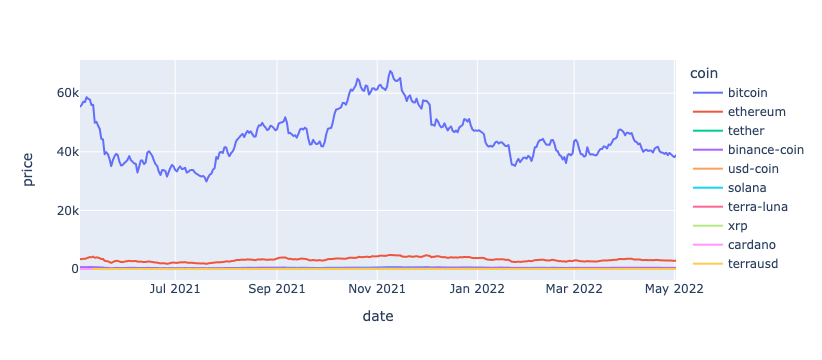

In [149]:
fig = px.line(price_histories_df, x="date", y="price", color="coin")
fig.show()

# Return histories

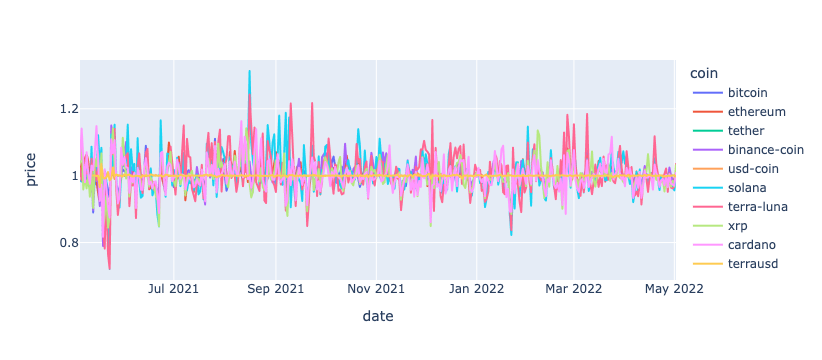

In [179]:
fig = px.line(return_histories_df, x="date", y="price", color="coin")
fig.show()

# Rebased price history

In [151]:
start_date = dt.date.today()-dt.timedelta(350)

In [152]:
start_date

datetime.date(2021, 5, 19)

In [153]:
return_histories_df.head()

,coin,date,price
0,bitcoin,2021-05-05 00:00:00,1.009582
1,bitcoin,2021-05-06 00:00:00,1.020243
2,bitcoin,2021-05-07 00:00:00,0.997649
3,bitcoin,2021-05-08 00:00:00,1.029625
4,bitcoin,2021-05-09 00:00:00,0.990072


In [159]:
bitcoin_rebase = return_histories_df[(return_histories_df['date']>=pd.Timestamp(start_date)) 
                    & (return_histories_df['coin']=='bitcoin')]

In [166]:
bitcoin_rebase.head()

,coin,date,price
14,bitcoin,2021-05-19 00:00:00,1
15,bitcoin,2021-05-20 00:00:00,1.018324
16,bitcoin,2021-05-21 00:00:00,0.982342
17,bitcoin,2021-05-22 00:00:00,0.958693
18,bitcoin,2021-05-23 00:00:00,0.934782


In [165]:
bitcoin_rebase['price'].iloc[0]=1

/var/folders/ff/pmf9d5156jz_pr_s8ybs3x780000gn/T/ipykernel_15084/429660237.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [175]:
rebased_price=[1]
for i in range(1,len(bitcoin_rebase)):
    rebased_price.append(bitcoin_rebase['price'].iloc[i]*rebased_price[i-1])

In [178]:
bitcoin_rebase['rebased_price']=rebased_price

/var/folders/ff/pmf9d5156jz_pr_s8ybs3x780000gn/T/ipykernel_15084/1561476697.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [187]:
start_date = dt.date.today()-dt.timedelta(360)
rebased_prices_df = pd.DataFrame(columns=['coin','date','price','rebased_price'])
for id in ids_list:
    temp_rebase_df = return_histories_df[(return_histories_df['date']>=pd.Timestamp(start_date)) 
                                         & (return_histories_df['coin']==id)]
    rebased_price=[1]
    for i in range(1,len(temp_rebase_df)):
        rebased_price.append(temp_rebase_df['price'].iloc[i]*rebased_price[i-1])
    temp_rebase_df['rebased_price']=rebased_price
    rebased_prices_df = pd.concat([rebased_prices_df, temp_rebase_df])
    
    

/var/folders/ff/pmf9d5156jz_pr_s8ybs3x780000gn/T/ipykernel_15084/1122556680.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ff/pmf9d5156jz_pr_s8ybs3x780000gn/T/ipykernel_15084/1122556680.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/ff/pmf9d5156jz_pr_s8ybs3x780000gn/T/ipykernel_15084/1122556680.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

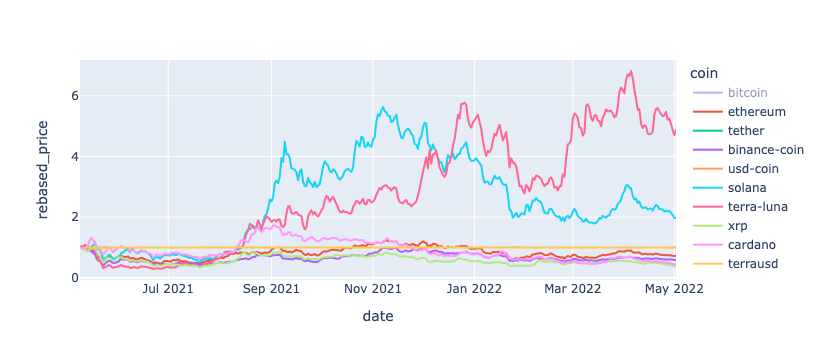

In [188]:
fig = px.line(rebased_prices_df, x="date", y="rebased_price", color="coin")
fig.show()

next up:
- create streamlit coin viewer
- loads up the top 10 coin's logos
- loads up the price histories for those coins
- on click allows you to add coins to graphs - just rebased for now.
- add: max drawdown, vol, sharpe ratio, returns (absolute and annualised)


Then;
- create portfolio viewer

In [193]:
import base64
import os
import glob


In [199]:
new_data = []
for name in glob.glob("logos/*.png"):
    with open(name, "rb") as image_file:
        result = base64.b64encode(image_file.read())
        f = open(f"{name}.txt", "wb")
        f. write(result)
        f. close()
        new_data.append(result)

In [201]:
globals()['__name__']

'__main__'

In [204]:
return_histories_df['coin']

bitcoin         363
ethereum        363
tether          363
binance-coin    363
usd-coin        363
solana          363
terra-luna      363
xrp             363
cardano         363
terrausd        355
Name: coin, dtype: int64

In [205]:
temp_list=['bitcoin','ethereum']

In [208]:
return_histories_df[return_histories_df['coin'].isin(temp_list)]

,coin,date,price
0,bitcoin,2021-05-05 00:00:00,1.009582
1,bitcoin,2021-05-06 00:00:00,1.020243
2,bitcoin,2021-05-07 00:00:00,0.997649
3,bitcoin,2021-05-08 00:00:00,1.029625
4,bitcoin,2021-05-09 00:00:00,0.990072
...,...,...,...
358,ethereum,2022-04-28 00:00:00,1.017321
359,ethereum,2022-04-29 00:00:00,0.985612
360,ethereum,2022-04-30 00:00:00,0.980069
361,ethereum,2022-05-01 00:00:00,0.989261


In [ ]:
df[df['Your_Column'].isin([3, 6])]